In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
from datetime import datetime

In [80]:
money = pd.read_csv("Downloads/PPPP.csv") 

In [81]:
money.head(5)

,nominal,data,curs,cdx
0,1,10.01.2019,"67,0795",Доллар США
1,1,11.01.2019,"66,8605",Доллар США
2,1,12.01.2019,"66,9167",Доллар США
3,1,15.01.2019,"67,1920",Доллар США
4,1,16.01.2019,"67,0820",Доллар США


In [82]:
target_columns = ["data", "curs"]

In [83]:
money = money[target_columns]

In [84]:
money.head(5)

,data,curs
0,10.01.2019,"67,0795"
1,11.01.2019,"66,8605"
2,12.01.2019,"66,9167"
3,15.01.2019,"67,1920"
4,16.01.2019,"67,0820"


In [87]:
real_columns = ["date","value"]

In [88]:
money.columns = real_columns

In [89]:
money.head(5)

,date,value
0,10.01.2019,"67,0795"
1,11.01.2019,"66,8605"
2,12.01.2019,"66,9167"
3,15.01.2019,"67,1920"
4,16.01.2019,"67,0820"


In [90]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    354 non-null    object
 1   value   354 non-null    object
dtypes: object(2)
memory usage: 5.7+ KB


In [91]:
def convert_money(string):
    return float(string.replace(",", "."))

In [92]:
convert_money("1,2")

1.2

In [93]:
def convert_date(string):
    return datetime.strptime(string, "%d.%m.%Y")

In [94]:
convert_date("21.09.2020")

datetime.datetime(2020, 9, 21, 0, 0)

In [95]:
money["value"] = money["value"].apply(convert_money)

In [96]:
money["date"] = money["date"].apply(convert_date)

In [97]:
money.head(5)

,date,value
0,2019-01-10,67.0795
1,2019-01-11,66.8605
2,2019-01-12,66.9167
3,2019-01-15,67.1920
4,2019-01-16,67.0820


In [98]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    354 non-null    datetime64[ns]
 1   value   354 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


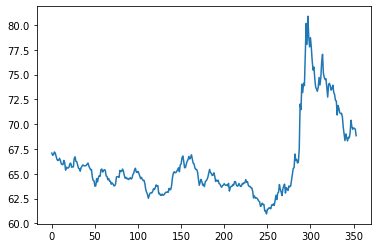

In [99]:
plt.plot(money["value"])

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
len(money)

354

In [102]:
money["id"] = range(len(money))

In [103]:
money.head(5)

,date,value,id
0,2019-01-10,67.0795,0
1,2019-01-11,66.8605,1
2,2019-01-12,66.9167,2
3,2019-01-15,67.1920,3
4,2019-01-16,67.0820,4


In [25]:
end = 320

In [26]:
X = money[["id"]][:end] #не включая end
y = money["value"][:end]

In [27]:
X_test = money[["id"]][end:]
y_test = money["value"][end:]

In [28]:
reg = LinearRegression().fit(X,y)

In [29]:
y_pred = reg.predict(X_test)

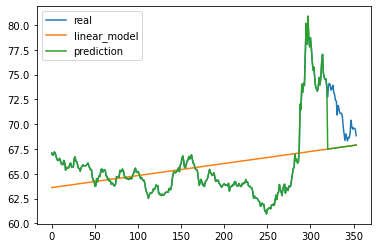

In [30]:
plt.plot(money["value"], label="real")
plt.plot(reg.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_pred), label="prediction")
plt.legend()

In [31]:
from sklearn.linear_model import RidgeCV

In [32]:
reg = RidgeCV(normalize=True, alphas=[2,3,4]).fit(X,y)
y_pred2 = reg.predict(X_test)

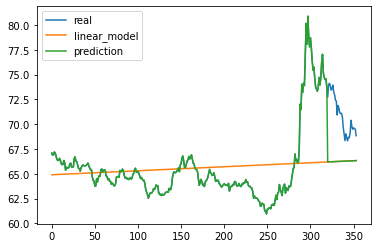

In [33]:
plt.plot(money["value"], label="real")
plt.plot(reg.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_pred2), label="prediction")
plt.legend()

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
reg = DecisionTreeRegressor().fit(X,y)
y_pred3 = reg.predict(X_test)

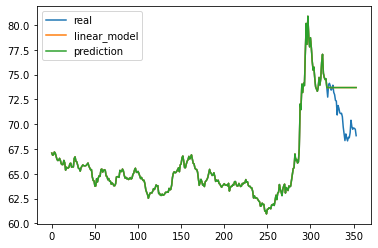

In [36]:
plt.plot(money["value"], label="real")
plt.plot(reg.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_pred3), label="prediction")
plt.legend()

In [37]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()

In [38]:
gpr = GaussianProcessRegressor(kernel=kernel,
                               random_state=0).fit(X,y)

In [39]:
y_pred4 = gpr.predict(X_test)

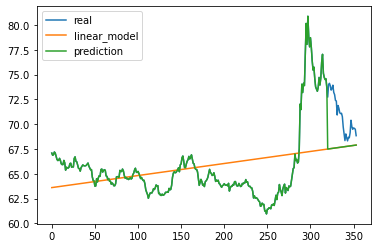

In [40]:
plt.plot(money["value"], label="real")
plt.plot(gpr.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_pred4), label="prediction")
plt.legend()

In [41]:
from sklearn.linear_model import HuberRegressor, LinearRegression

In [42]:
huber = HuberRegressor().fit(X,y)

In [43]:
y_pred5 = huber.predict(X_test)

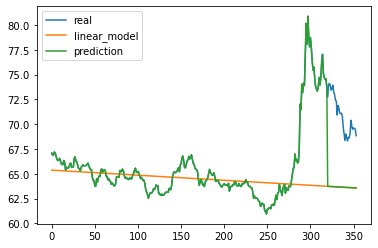

In [44]:
plt.plot(money["value"], label="real")
plt.plot(huber.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_pred5), label="prediction")
plt.legend()

In [45]:
from sklearn.linear_model import Lasso

In [46]:
lasso = Lasso()

In [47]:
lasso.fit(X,y)

Lasso()

In [48]:
y_pred_lasso = lasso.predict(X_test)

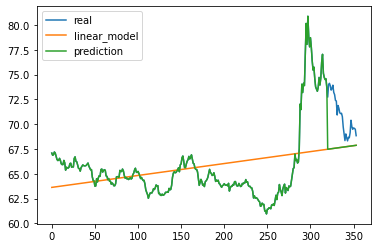

In [49]:
plt.plot(money["value"], label="real")
plt.plot(lasso.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_pred_lasso), label="prediction")
plt.legend()

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
forest = RandomForestRegressor()

In [52]:
forest.fit(X,y)

RandomForestRegressor()

In [53]:
y_pred_forest = forest.predict(X_test)

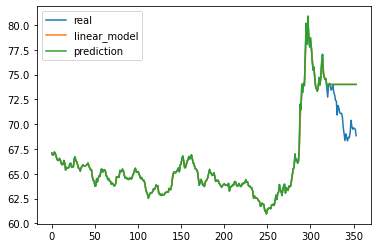

In [54]:
plt.plot(money["value"], label="real")
plt.plot(forest.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_pred_forest), label="prediction")
plt.legend()

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
gbrt = GradientBoostingRegressor()

In [57]:
gbrt.fit(X,y)

GradientBoostingRegressor()

In [58]:
y_pred_gbrt = gbrt.predict(X_test)

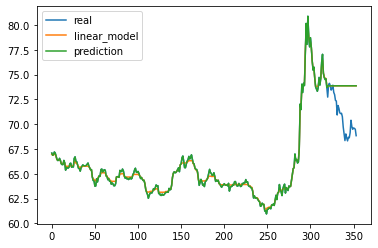

In [59]:
plt.plot(money["value"], label="real")
plt.plot(gbrt.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_pred_gbrt), label="prediction")
plt.legend()

In [60]:
from sklearn.neural_network import MLPRegressor

In [61]:
mlp_r = MLPRegressor()

In [62]:
mlp_r.fit(X,y)

MLPRegressor()

In [63]:
y_pred_mlp_r = mlp_r.predict(X_test)

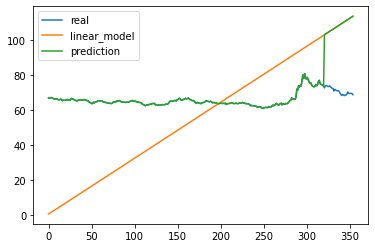

In [64]:
plt.plot(money["value"], label="real")
plt.plot(mlp_r.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_pred_mlp_r), label="prediction")
plt.legend()

In [65]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=10)

In [66]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

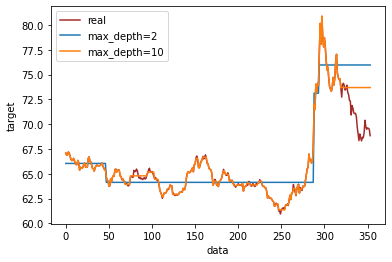

In [67]:
plt.plot(money["value"],color="brown", label="real")
plt.plot(regr_1.predict(money[["id"]]),label="max_depth=2")
plt.plot(regr_2.predict(money[["id"]]),label="max_depth=10")
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.show()

In [68]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [69]:
model = make_pipeline(PolynomialFeatures(), Ridge())

In [70]:
model.fit(X,y)
y_model = model.predict(X_test)

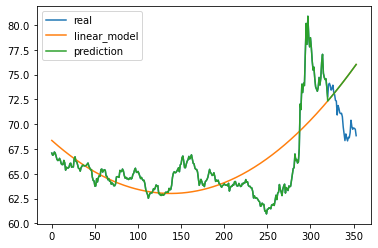

In [71]:
plt.plot(money["value"], label="real")
plt.plot(model.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_model), label="prediction")
plt.legend()

In [72]:
from sklearn import tree

In [73]:
clf = tree.DecisionTreeRegressor()

In [74]:
clf = clf.fit(X, y)

In [75]:
y_pred_clf = clf.predict(X_test)

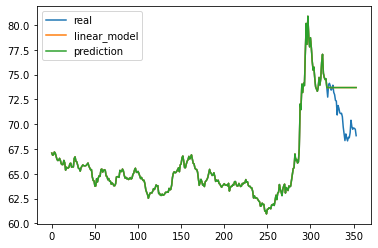

In [76]:
plt.plot(money["value"], label="real")
plt.plot(clf.predict(money[["id"]]), label="linear_model")
plt.plot(list(y) + list(y_pred_clf), label="prediction")
plt.legend()